# Gráfico das Vogais


Vamos utilizar as amostras de vogais disponívies na página do Prof. Bruce Hayes:
https://linguistics.ucla.edu/people/hayes/103/Charts/VChart/

Para tanto, primeiramente iremos criar um script Bash para baixar todos os arquivos .wav referenciados neste sítio e salvá-los no diretório */tmp*.

In [7]:
URL="https://linguistics.ucla.edu/people/hayes/103/Charts/VChart/"
curl -s $URL | grep -E -o "[A-Za-z]+\.wav" > listwavfiles
cat listwavfiles | while read line
do
  wget $URL$line -q -O /tmp/$line
done

Agora utilizaremos o GNU Octave para obter os formantes das vogais contidas nos arquivos .wav previamente baixados. Para tanto utilizaremos a função *lpc*, que retornará os coeficientes de filtro. Basta então encontrar os ângulos dos pólos para obter as frequências dos formantes das vogais. Cada vogal será apresentada no gráfico de F2xF1.

foldername = /tmp/
1	/tmp/BackwardSchwa.wav
2	/tmp/BackwardScriptA.wav
3	/tmp/BackwardsEpsilon.wav
4	/tmp/BarredI.wav
5	/tmp/BarredO.wav
6	/tmp/BarredU.wav
7	/tmp/CapitalOE.wav
8	/tmp/CapitalU.wav
9	/tmp/CapitalY.wav
10	/tmp/Caret.wav
11	/tmp/CentralA.wav
12	/tmp/ClosedSidewaysEpsilon.wav
13	/tmp/Epsilon.wav
15	/tmp/LowerCaseOE.wav
16	/tmp/OpenO.wav
17	/tmp/RamsHorns.wav
18	/tmp/ScriptA.wav
19	/tmp/SlashO.wav
20	/tmp/SmallCapI.wav
21	/tmp/UpsideDownA.wav
22	/tmp/UpsideDownM.wav
23	/tmp/ae.wav
24	/tmp/e.wav
25	/tmp/i.wav
26	/tmp/o.wav
27	/tmp/u.wav
28	/tmp/y.wav


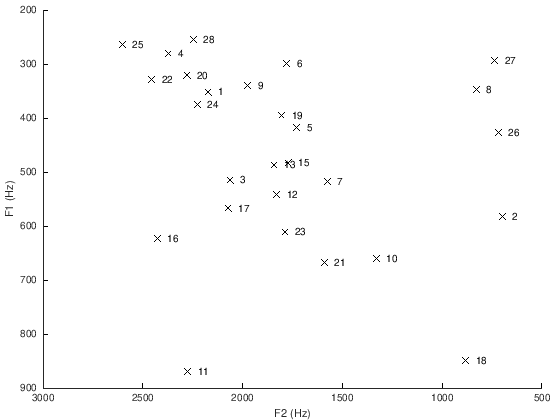

In [8]:
pkg load signal

foldername = '/tmp/'
listfiles = dir(cstrcat(foldername,'*.wav'));

F = []; figure; hold on;
for i=1:length(listfiles),
  if listfiles(i).bytes > 0,
    filename=cstrcat(listfiles(i).folder, '/', listfiles(i).name);
    printf('%d\t%s\n',i,filename);
    [x,fs]=audioread(filename);
    [a,g] = lpc(x,8);
    f = round (sort (unique (abs (angle (roots (a))))) * fs / (2 * pi) );
    if f(1)==0, f=f(2:end); endif;
    F(i,:) = f(1:3)';
    plot(f(2),f(1),'kx');
    text(f(2)-50,f(1),num2str(i));
  endif
endfor;
xlabel('F2 (Hz)'); ylabel('F1 (Hz)');
set (gca (), "xdir", "reverse")
set (gca (), "ydir", "reverse")